In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pycountry
# from fuzzywuzzy import process
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('survey_results_public.csv')

In [ ]:
# def simplify_age(age):
#     if pd.isna(age):
#         return 21.0  # Midpoint for 'Unknown'
#     elif isinstance(age, str):  # Ensure 'age' is a string before checking its value
#         if '18-24' in age:
#             return 21.0
#         elif '25-34' in age:
#             return 29.5
#         elif '35-44' in age:
#             return 39.5
#         elif '45-54' in age:
#             return 49.5
#         elif '55-64' in age:
#             return 59.5
#         elif '65' in age:
#             return 70.0
#     return 21.0  # Default to midpoint for 'Unknown' or other unhandled values

# # Apply simplifications to X_train and X_test
# # Simplify EdLevel
# for df in [X_train, X_test]:
#     df['EdLevel'] = df['EdLevel'].replace({
#         r"Bachelor.*": 'Bachelor’s Degree',
#         r"Master.*": 'Master’s Degree',
#         r"Professional.*": 'Professional Degree',
#         r"Associate.*": 'Associate Degree',
#         r"Primary.*": 'Primary School',
#         r"Secondary.*": 'Secondary School',
#         r"Some.*": 'Some College',
#         r".*else": 'Other'
#     }, regex=True)

#     # Simplify Employment
#     df['Employment'] = df['Employment'].str.split(';').str[0]  # Keep only the first category if there are multiple

#     # Simplify RemoteWork
#     df['RemoteWork'] = df['RemoteWork'].replace({
#         r"Hybrid \(some remote, some in-person\)": 'Hybrid'
#     }, regex=True)

#     # Simplify CodingActivities
#     df['CodingActivities'] = df['CodingActivities'].replace({
#         r".*Hobby.*": 'Hobby',
#         r".*Professional.*": 'Professional Development'
#     }, regex=True)

#     # Simplify LearnCode and LearnCodeOnline
#     df['LearnCode'] = df['LearnCode'].replace({
#         r".*online.*|.*videos.*|.*tutorials.*": 'Online Resources',
#         r".*books.*|.*media.*": 'Books',
#         r".*blogs.*": 'Blogs'
#     }, regex=True)

#     df['LearnCodeOnline'] = df['LearnCodeOnline'].replace({
#         r".*online.*|.*videos.*|.*tutorials.*": 'Online Resources',
#         r".*books.*|.*media.*": 'Books',
#         r".*blogs.*": 'Blogs'
#     }, regex=True)

#     # Simplify SurveyEase and SurveyLength
#     df['SurveyEase'] = df['SurveyEase'].replace({
#         r"Appropriate.*": 'Appropriate',
#         r"Easy": 'Easy',
#         r".*difficult.*": 'Difficult'
#     }, regex=True)

#     df['SurveyLength'] = df['SurveyLength'].replace({
#         r"Appropriate.*": 'Appropriate',
#         r"Too.*": 'Too Long'
#     }, regex=True)

#     # Simplify Age column using the defined function and convert to numerical
#     df['Age'] = df['Age'].apply(lambda x: simplify_age(x))

# # Convert appropriate columns to categorical in both X_train and X_test
# for df in [X_train, X_test]:
#     df['EdLevel'] = df['EdLevel'].astype('category')
#     df['Employment'] = df['Employment'].astype('category')
#     df['RemoteWork'] = df['RemoteWork'].astype('category')
#     df['CodingActivities'] = df['CodingActivities'].astype('category')
#     df['LearnCode'] = df['LearnCode'].astype('category')
#     df['LearnCodeOnline'] = df['LearnCodeOnline'].astype('category')
#     df['SurveyEase'] = df['SurveyEase'].astype('category')
#     df['SurveyLength'] = df['SurveyLength'].astype('category')

Demographic Distribution For Age

In [4]:

age_mapping = {
    'Under 18 years old': '<18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+'
}


df['AgeGroup'] = df['Age'].map(age_mapping)


In [5]:
print(df[['Age', 'AgeGroup']].head(10))


                  Age AgeGroup
0  Under 18 years old      <18
1     35-44 years old    35-44
2     45-54 years old    45-54
3     18-24 years old    18-24
4     18-24 years old    18-24
5  Under 18 years old      <18
6     35-44 years old    35-44
7     18-24 years old    18-24
8     45-54 years old    45-54
9     35-44 years old    35-44


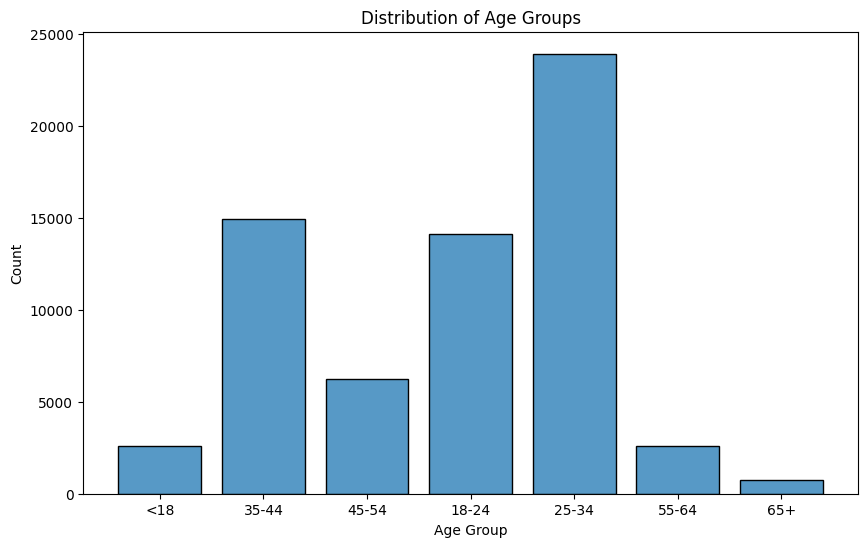

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AgeGroup', shrink=0.8)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


Education Level

C:\Users\msn\AppData\Local\Temp\ipykernel_20424\2782881029.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




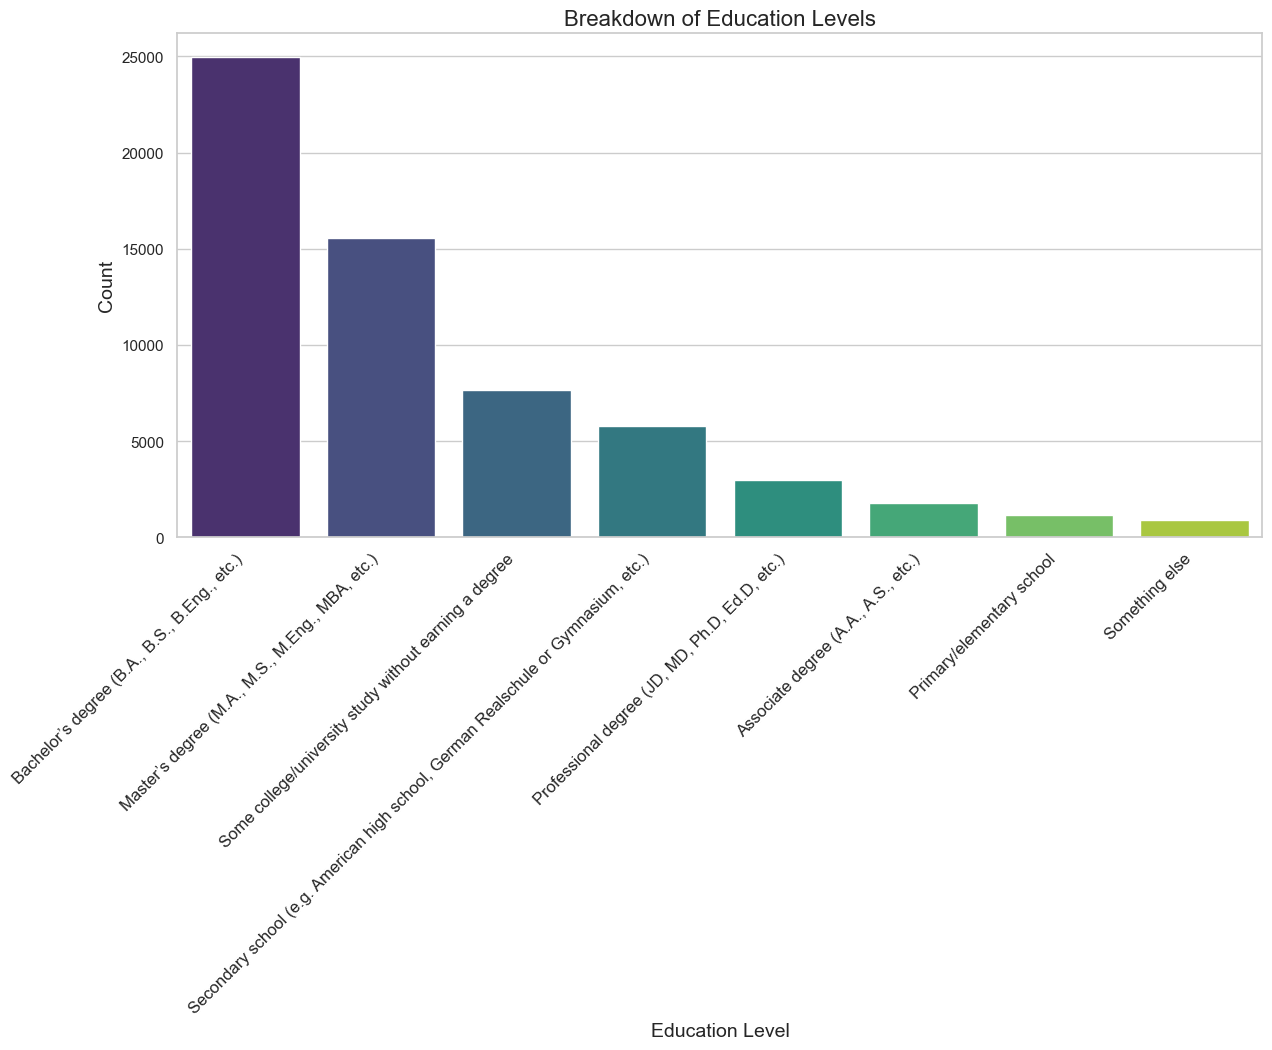

In [7]:
education_counts = df['EdLevel'].value_counts()
sns.set(style='whitegrid')
plt.figure(figsize=(14, 8))  
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis', order=education_counts.index)

plt.title('Breakdown of Education Levels', fontsize=16)  
plt.xlabel('Education Level', fontsize=14)  
plt.ylabel('Count', fontsize=14)  

plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.subplots_adjust(bottom=0.25)  
plt.show()


Professional Characteristics

Job Role vs. Satisfaction

C:\Users\msn\AppData\Local\Temp\ipykernel_20424\2780453046.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




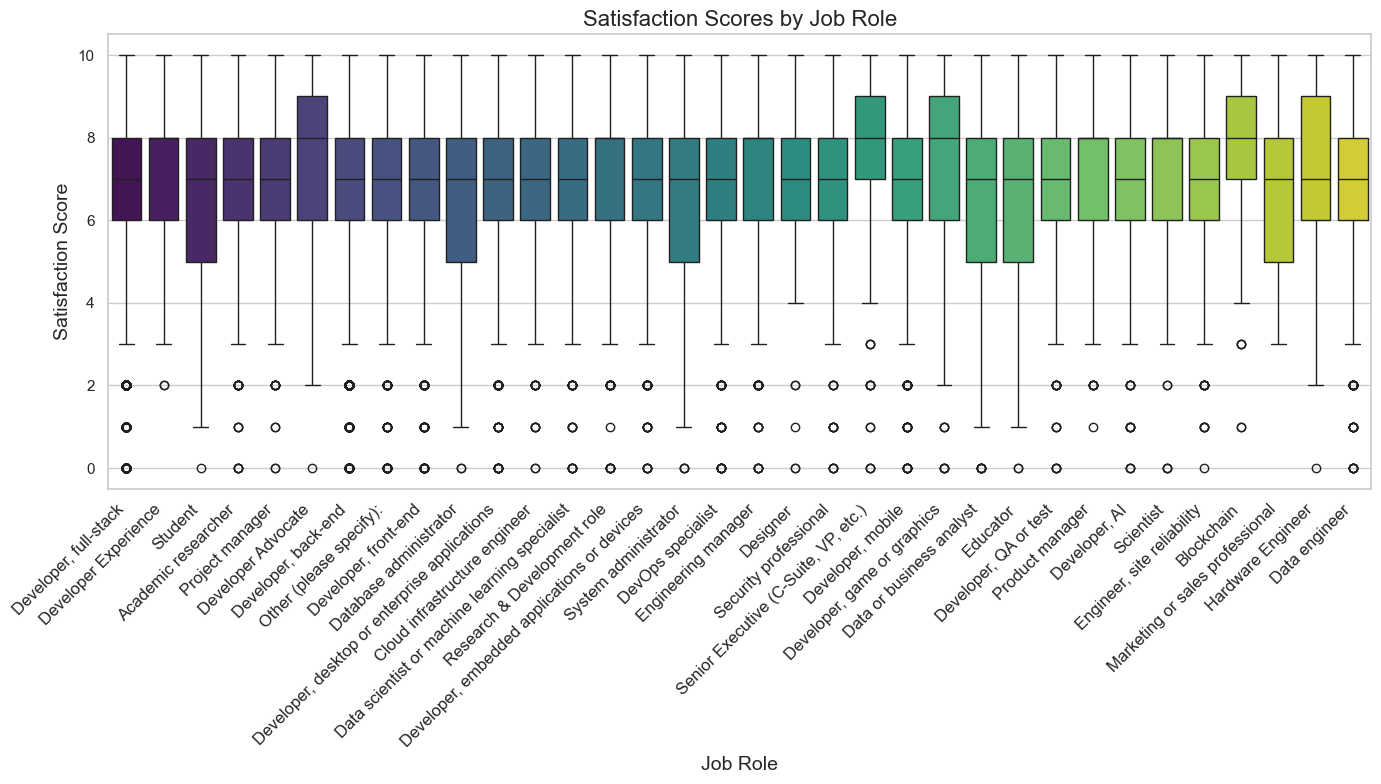

In [8]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 8)) 
sns.boxplot(x='DevType', y='JobSat', data=df, palette='viridis')

plt.title('Satisfaction Scores by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=14)
plt.ylabel('Satisfaction Score', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)  

plt.tight_layout() 
plt.show()


Experience vs. Satisfaction

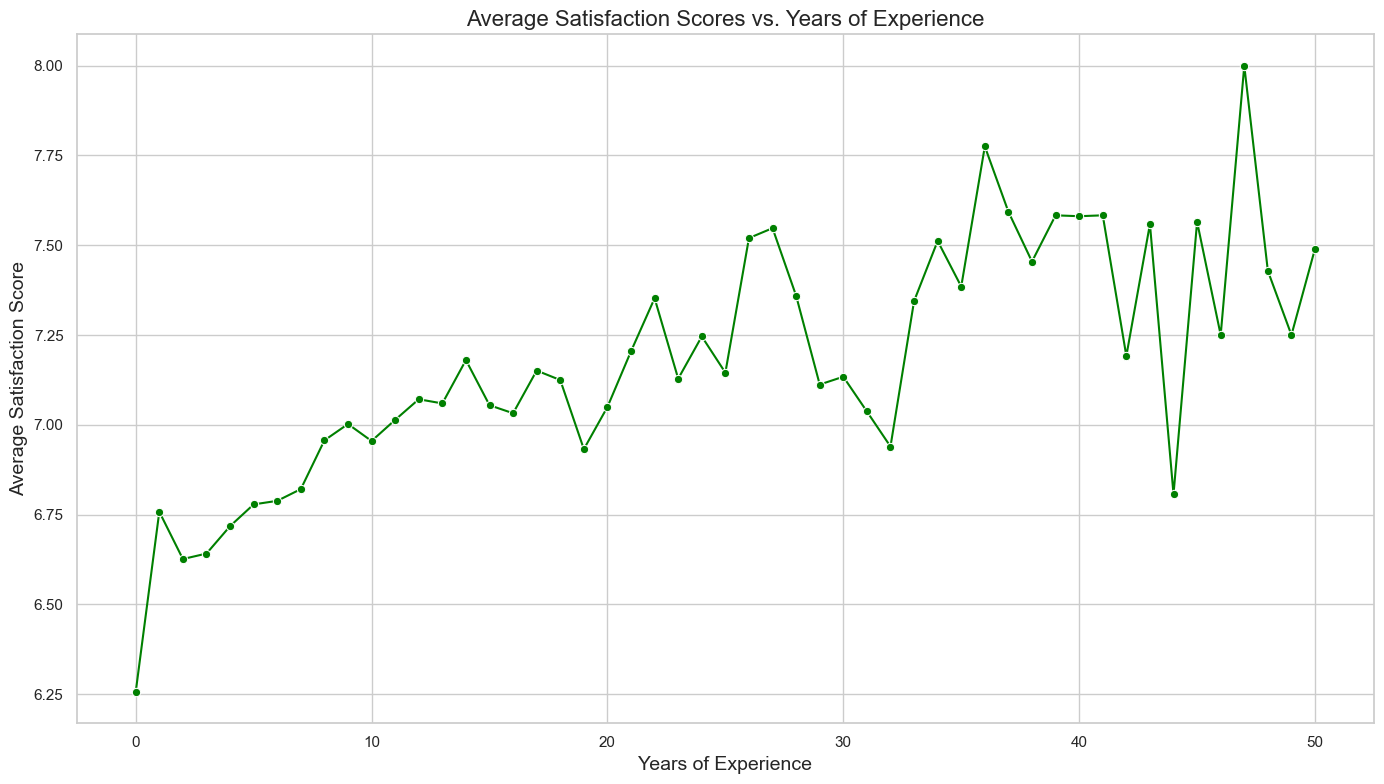

In [9]:
avg_satisfaction = df.groupby('WorkExp')['JobSat'].mean().reset_index()
plt.figure(figsize=(14, 8)) 
sns.lineplot(x='WorkExp', y='JobSat', data=avg_satisfaction, marker='o', color='green')
plt.title('Average Satisfaction Scores vs. Years of Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Average Satisfaction Score', fontsize=14)
plt.tight_layout()
plt.show()


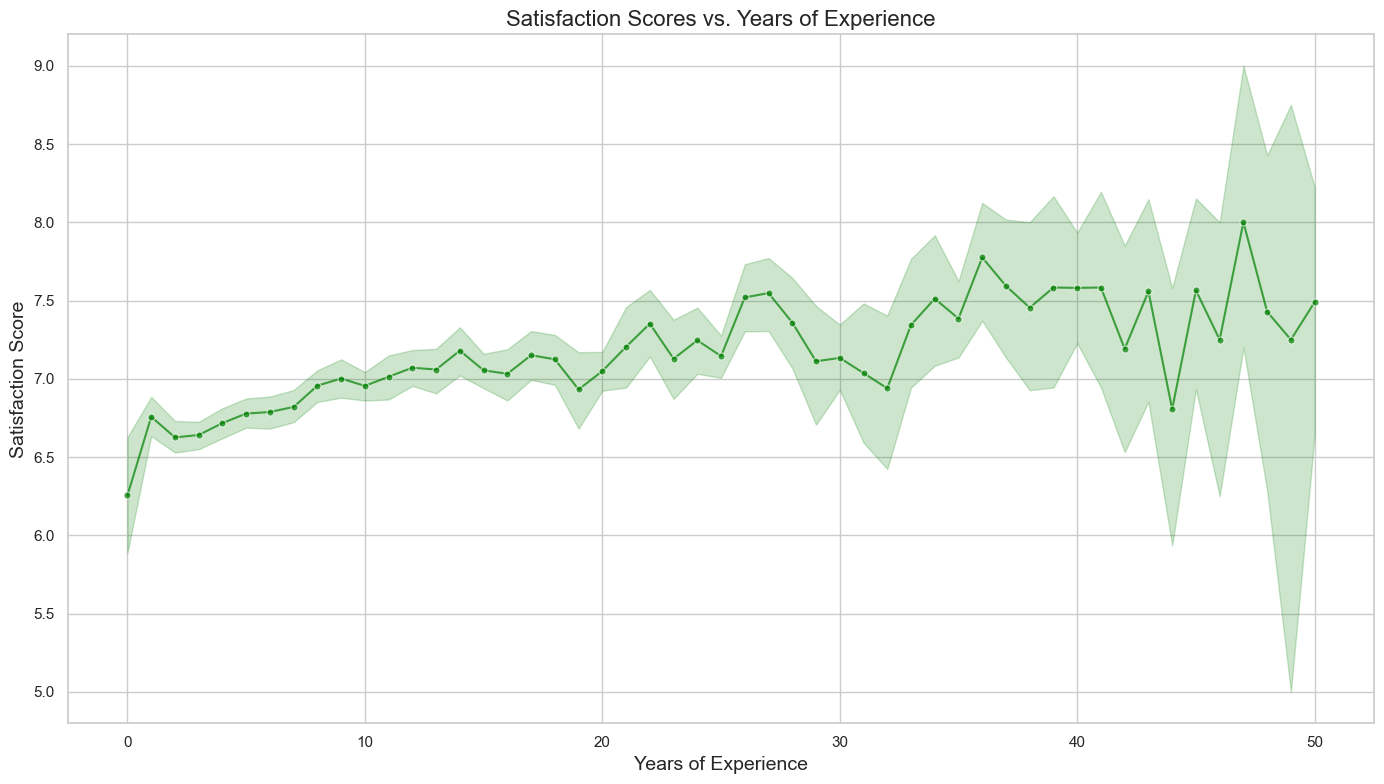

In [10]:
# Create a line plot without averaging
plt.figure(figsize=(14, 8))  
sns.lineplot(x='WorkExp', y='JobSat', data=df, color='green', marker='o', markersize=5, alpha=0.7)
plt.title('Satisfaction Scores vs. Years of Experience', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Satisfaction Score', fontsize=14)
plt.tight_layout()
plt.show()


Work Environment Insights

Remote Vs. In Office Work Satisfaction

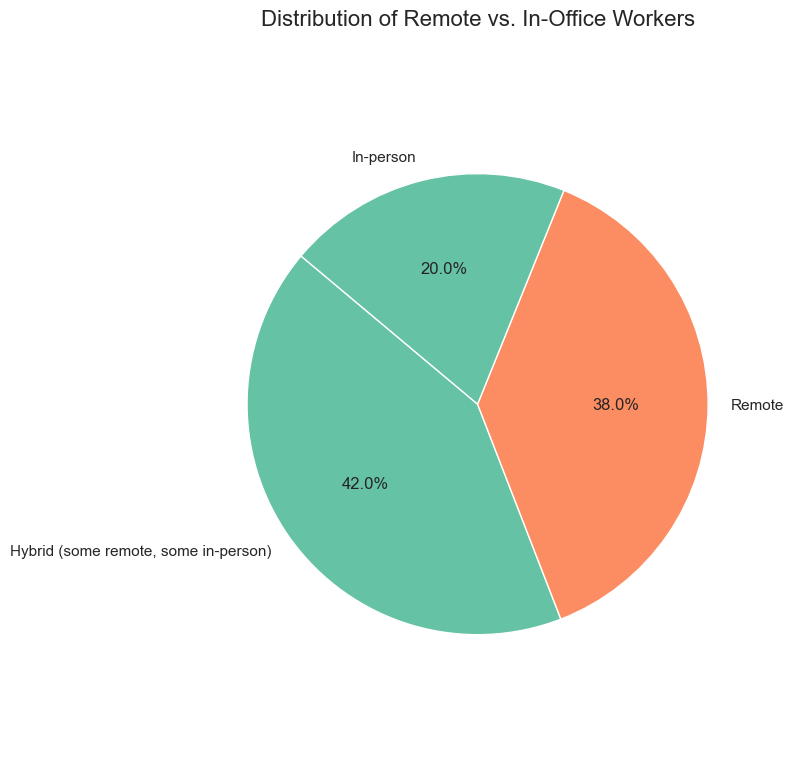

In [11]:
satisfaction_counts = df['RemoteWork'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Distribution of Remote vs. In-Office Workers', fontsize=16)
plt.axis('equal')  
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

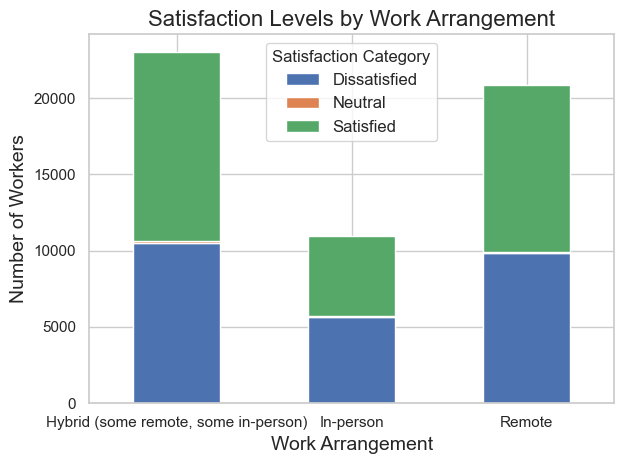

In [12]:
# Step 1: Categorize satisfaction scores
def categorize_satisfaction(score):
    if score > 1:
        return 'Satisfied'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Dissatisfied'

# Apply categorization
df['SatisfactionCategory'] = df['JobSat'].apply(categorize_satisfaction)

# Step 2: Count categories by work arrangement
satisfaction_counts = df.groupby(['RemoteWork', 'SatisfactionCategory']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
satisfaction_counts.plot(kind='bar', stacked=True)
plt.title('Satisfaction Levels by Work Arrangement', fontsize=16)
plt.xlabel('Work Arrangement', fontsize=14)
plt.ylabel('Number of Workers', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Category', fontsize=12)
plt.tight_layout()
plt.show()




Company Size and Satisfaction

C:\Users\msn\AppData\Local\Temp\ipykernel_20424\3951540718.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




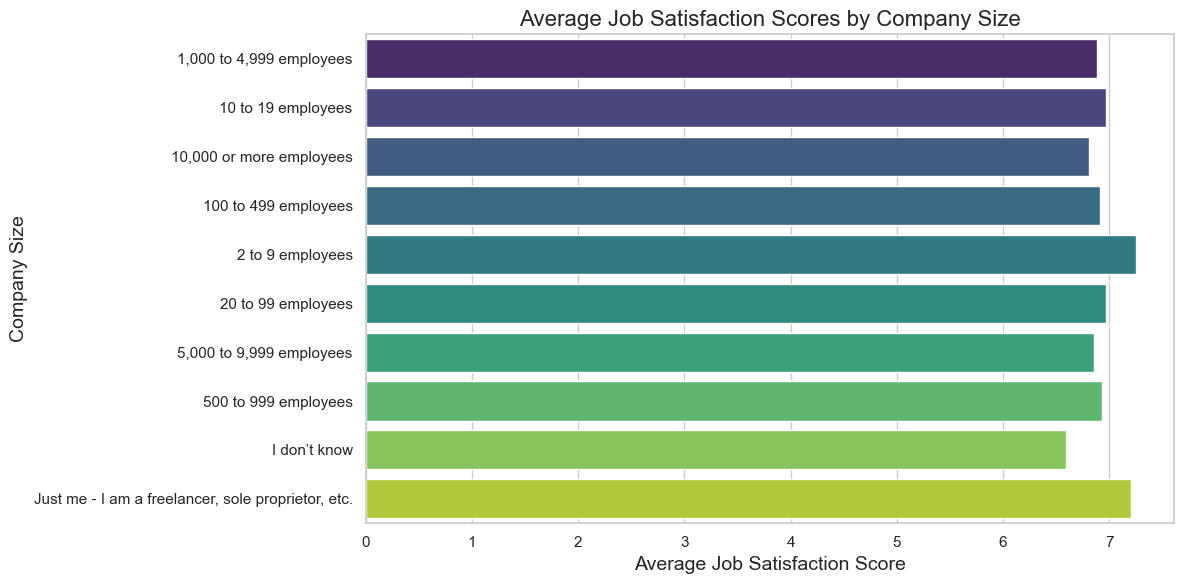

In [13]:
# Group by company size and calculate average satisfaction scores
average_satisfaction = df.groupby('OrgSize')['JobSat'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(y='OrgSize', x='JobSat', data=average_satisfaction, palette='viridis')
plt.title('Average Job Satisfaction Scores by Company Size', fontsize=16)
plt.xlabel('Average Job Satisfaction Score', fontsize=14)
plt.ylabel('Company Size', fontsize=14)
plt.tight_layout()
plt.show()



Compensation and Benefits

Salary vs. Satisfaction

C:\Users\msn\AppData\Local\Temp\ipykernel_20424\1591887687.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '<10k'),
  Text(1, 0, '10k-20k'),
  Text(2, 0, '20k-30k'),
  Text(3, 0, '30k-60k'),
  Text(4, 0, '60k-90k'),
  Text(5, 0, '90k-120k'),
  Text(6, 0, '120k-150k'),
  Text(7, 0, '150k+')])

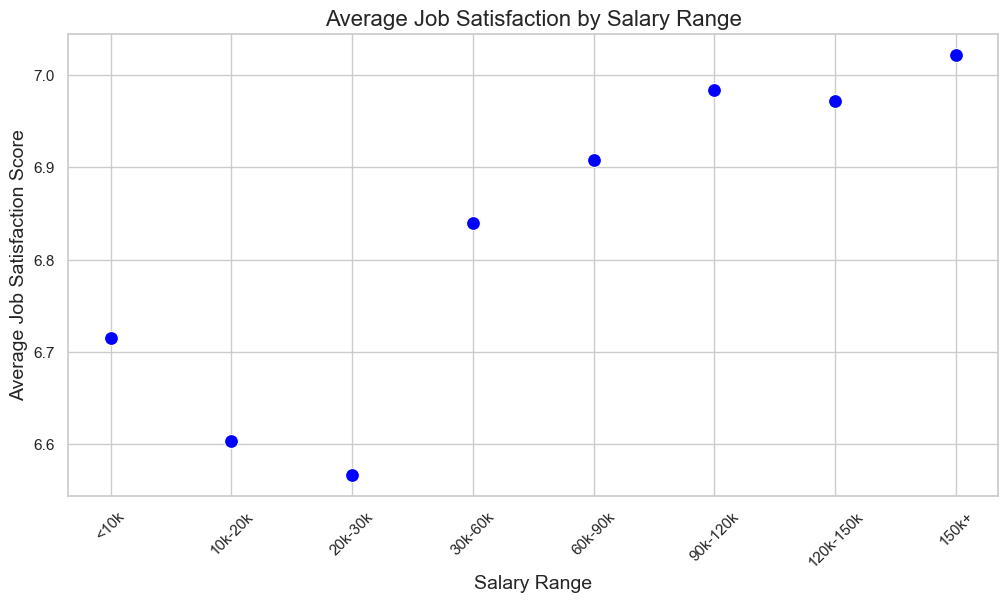

In [14]:
# Create salary ranges
bins = [0, 10000, 20000, 30000, 60000, 90000, 120000, 150000, float('inf')]  
labels = ['<10k', '10k-20k', '20k-30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']
df['SalaryRange'] = pd.cut(df['CompTotal'], bins=bins, labels=labels)

average_satisfaction = df.groupby('SalaryRange')['JobSat'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.scatterplot(data=average_satisfaction, x='SalaryRange', y='JobSat', s=100, color='blue') 
plt.title('Average Job Satisfaction by Salary Range', fontsize=16)
plt.xlabel('Salary Range', fontsize=14)
plt.ylabel('Average Job Satisfaction Score', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)  


Benefits vs. Satisfaction

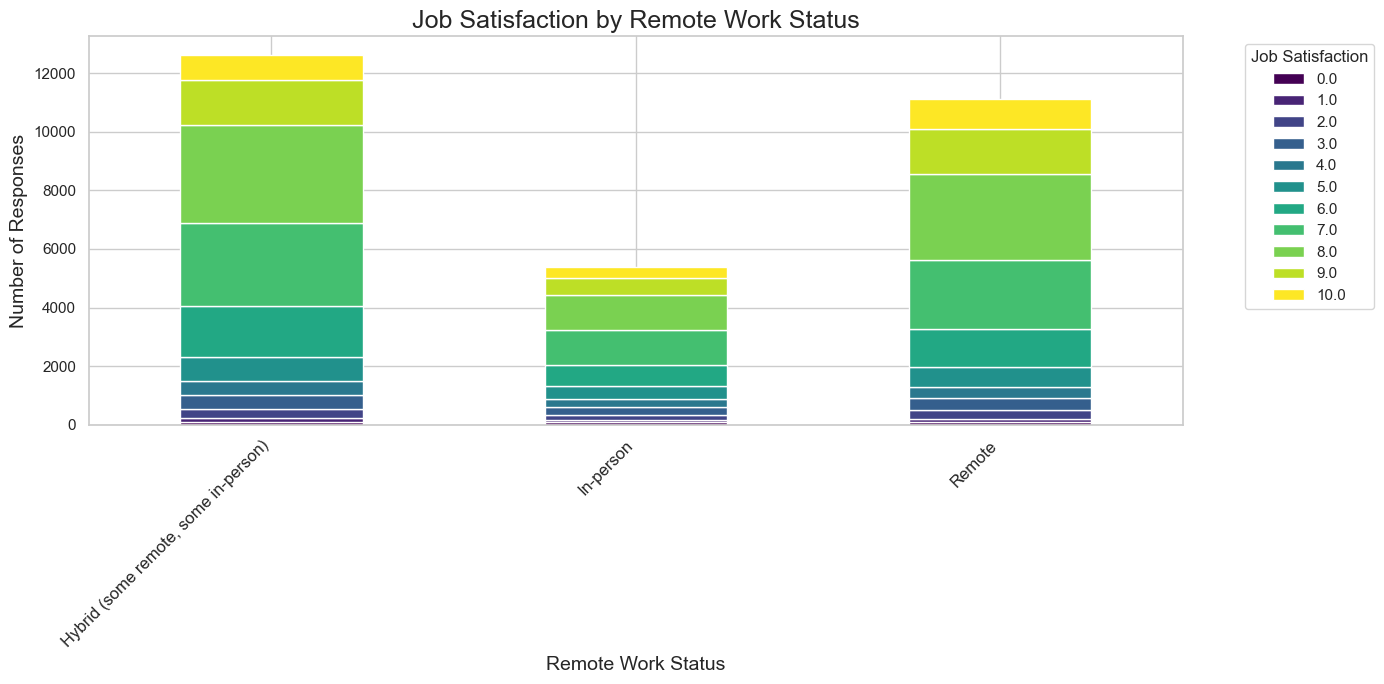

In [15]:
satisfaction_counts = df.groupby(['RemoteWork', 'JobSat']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 7))
ax = satisfaction_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Job Satisfaction by Remote Work Status', fontsize=18)
plt.xlabel('Remote Work Status', fontsize=14)
plt.ylabel('Number of Responses', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()


Career development

Opportunities for Growth vs. Satisfaction

In [16]:
# Display all column names
print(df.columns)


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly', 'JobSat', 'AgeGroup',
       'SatisfactionCategory', 'SalaryRange'],
      dtype='object', length=117)


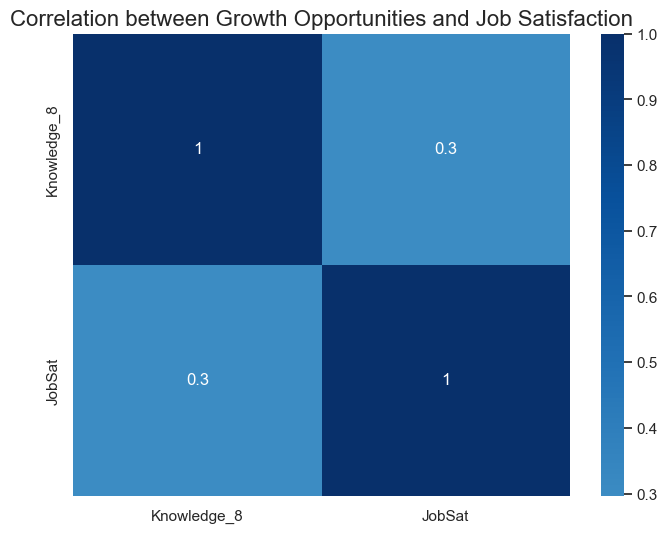

In [17]:


# Define mapping for Knowledge_8
knowledge_mapping = {
    'Strongly disagree': 1,
    'Disagree': 2,
    'Neither agree nor disagree': 3,
    'Agree': 4,
    'Strongly agree': 5
}

# Map the categorical responses in Knowledge_8 to numerical values
df['Knowledge_8'] = df['Knowledge_8'].map(knowledge_mapping)

# Drop rows with NaN values in either column
df_growth_satisfaction = df[['Knowledge_8', 'JobSat']].dropna()

# Calculate the correlation matrix
correlation_matrix = df_growth_satisfaction.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)  # Choose your color map
plt.title('Correlation between Growth Opportunities and Job Satisfaction', fontsize=16)
plt.show()


Unique values in Knowledge_8: [nan  4.  3.  2.  5.  1.]


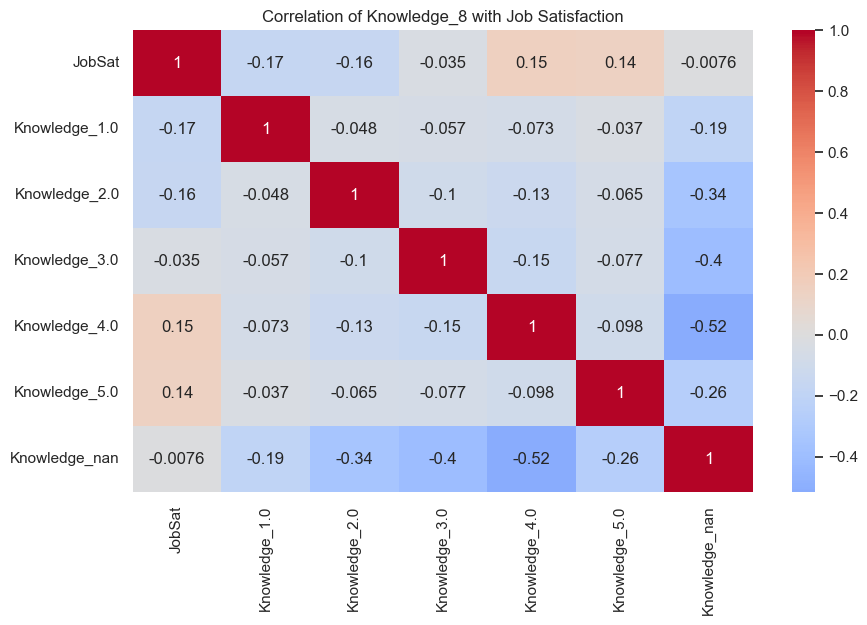

In [18]:
# Check unique values in Knowledge_8
print("Unique values in Knowledge_8:", df['Knowledge_8'].unique())

knowledge_dummies = pd.get_dummies(df['Knowledge_8'], prefix='Knowledge', dummy_na=True)

df_combined = pd.concat([df, knowledge_dummies], axis=1)

correlation_matrix = df_combined[['JobSat'] + list(knowledge_dummies.columns)].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Knowledge_8 with Job Satisfaction')
plt.show()


Learning Resources

C:\Users\msn\AppData\Local\Temp\ipykernel_20424\3907440110.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




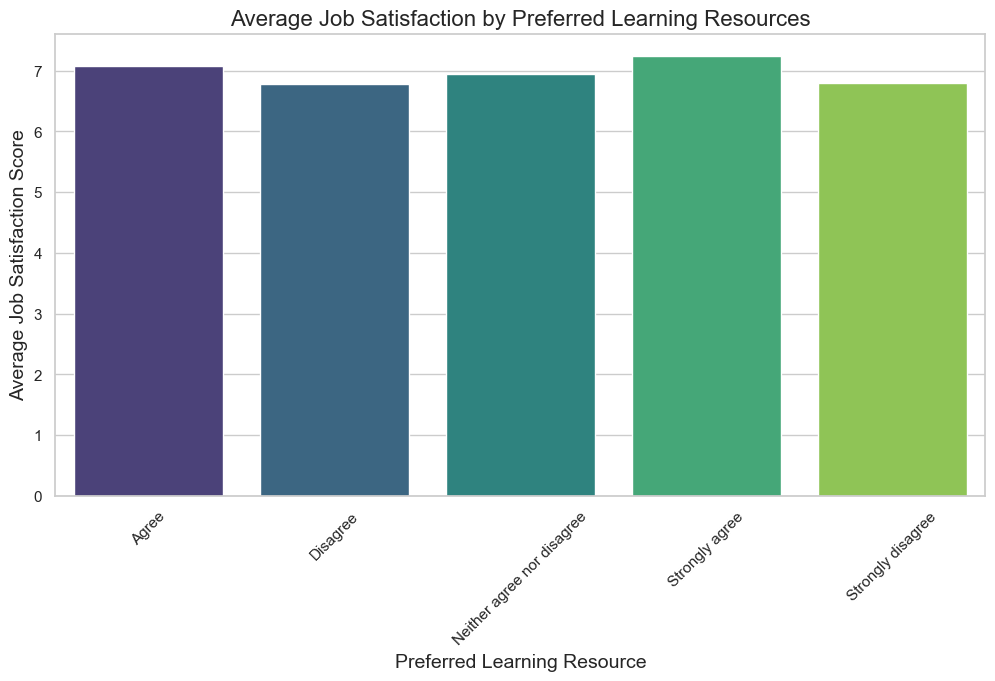

In [19]:
# Calculate the average JobSat for each Knowledge_9
learning_resources_satisfaction = df.groupby('Knowledge_9')['JobSat'].mean().reset_index()

# Create the vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=learning_resources_satisfaction, x='Knowledge_9', y='JobSat', palette='viridis')
plt.title('Average Job Satisfaction by Preferred Learning Resources', fontsize=16)
plt.xlabel('Preferred Learning Resource', fontsize=14)
plt.ylabel('Average Job Satisfaction Score', fontsize=14)
plt.xticks(rotation=45)
plt.show()


Country

In [20]:
# # Create a function to standardize country names using pycountry
# def standardize_country_name(country_name):
#     try:
#         # Try to get the country from the pycountry library
#         return pycountry.countries.lookup(country_name).name
#     except LookupError:
#         return country_name  # Return the original if not found

# # Apply the function to the Country column
# df['Country'] = df['Country'].apply(standardize_country_name)



# # List of known country names (you can get this from pycountry)
# known_countries = [country.name for country in pycountry.countries]

# # Define a function to get the best match for a given country name
# def get_best_country_match(country_name):
#     if isinstance(country_name, str):
#         best_match, score = process.extractOne(country_name, known_countries)
#         if score > 80:  # Adjust the threshold as needed
#             return best_match
#     return country_name  # Return original if no match

# # Apply the fuzzy matching function to the Country column
# df['Country'] = df['Country'].apply(get_best_country_match)

# # Check unique values after standardization
# print(df['Country'].unique())

In [21]:
import plotly.express as px 
import plotly.io as pio

# Set renderer to display in the notebook
pio.renderers.default = 'notebook'

# Prepare data for visualization
age_counts = df.Age.value_counts().reset_index(name='Count')
age_counts.columns = ['Age', 'Count']
total_count = age_counts['Count'].sum()
age_counts['Percentage'] = (age_counts['Count'] / total_count) * 100

# Create the Plotly bar chart
fig = px.bar(age_counts, x='Age', y='Count', text=age_counts['Percentage'].round(2), 
             color='Age', color_discrete_sequence=px.colors.sequential.Plasma, height=600)

# Update the layout for better display
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(title='Distribution of Ages in Survey Respondents', showlegend=False)

# Display the figure
fig.show()


In [24]:
# grouped_df = df.groupby(['Country', 'EdLevel']).size().reset_index(name='Count')
# total_counts = grouped_df.groupby('Country')['Count'].transform('sum')
# grouped_df['Percentage'] = (grouped_df['Count'] / total_counts) * 100
# grouped_df = df.groupby(['Country', 'EdLevel']).size().reset_index(name='Count')
# total_counts = grouped_df.groupby('Country')['Count'].transform('sum')
# grouped_df['Percentage'] = (grouped_df['Count'] / total_counts) * 100
# grouped_df['Country'] = grouped_df['Country'].replace({
#     'United States of America': 'USA',
#     'United Kingdom of Great Britain and Northern Ireland': 'UK'
# })
# top_countries = grouped_df.groupby('Country')['Count'].sum().nlargest(5).index

# top_countries_df = grouped_df[grouped_df['Country'].isin(top_countries)]

# fig = px.bar(top_countries_df, 
#              x='EdLevel', 
#              y='Percentage', 
#              color='EdLevel', 
#              facet_col='Country',
#              title='Percentage of Education Levels by Top 5 Countries',
#              labels={'Percentage': 'Percentage of Respondents', 'EdLevel': 'Education Level'},
#              height=600,
#              color_discrete_sequence=px.colors.sequential.Plasma,
#              facet_col_spacing=0.04)

# fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

# fig.update_layout(showlegend=False)

# fig.show()